In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/online_retail.csv", dtype={'CustomerID': str,'InvoiceID': str}, encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


> description하고 customerId에 결측값 존재

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#결측지 그냥 제거
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
#주문 수량이 음수인 경우 제거(환불로 추측)
print(len(df[df['Quantity'] <= 0]))
df = df[df['Quantity'] > 0]

8905


In [9]:
sum(df['UnitPrice'] <= 0)
#가격이 0 이하 제거
df = df[df['UnitPrice'] > 0]

In [10]:
#상품 코드에 숫자가 없는 것은 이상치 데이터. 제거
df['code'] = df['StockCode'].apply(lambda x: any(n.isdigit() for n in x))
df = df[df['code'] == True]

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True


In [12]:
import datetime as dt
df['date'] = df['InvoiceDate'].dt.date
df['date']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: date, Length: 396470, dtype: object

<AxesSubplot:xlabel='date'>

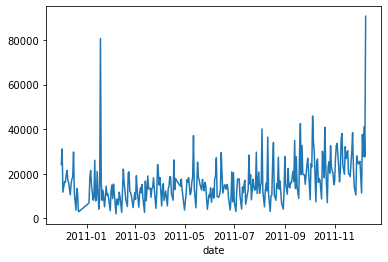

In [13]:
#날짜별 주문 거래량
y = df.groupby('date')['Quantity'].sum()
y.plot()

In [14]:
df = df.drop('code', axis=1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01


학습 데이터는 11월 전, 데스트 데이터는 11월 후로 잡고, 전후로 11월 전 구매, 11월 후 구매, 둘다 사면 재구매로 분류

In [15]:
df_date_before_11 = df[df['date'] < dt.date(2011, 11, 1)]
df_date_after_11 = df[df['date'] >= dt.date(2011, 11, 1)]

#11월 기준으로 유저별로 산 상품(StockCode) 
before_11_customer_item = df_date_before_11.groupby('CustomerID')['StockCode'].apply(set)
after_11_customer_item = df_date_after_11.groupby('CustomerID')['StockCode'].apply(set)

#before 11 구매, after 11 구매 = both
#before 11 구매, after 11 구매x = old
#before 11 구매x, after 11 구매o = new  딕셔너리에 저장

customer_item_dict = {}

#before_11에 'old' 삽입
for key, values in before_11_customer_item.items():
    customer_item_dict[key] = {}
    for item in values:
        customer_item_dict[key][item] = 'old'

#after_11의 값을 before_11과 비교하고, 있으면 'both' 없으면 'new'
for key, values in after_11_customer_item.items():
    #custmoer의 구매내역이 있는지
    if key in customer_item_dict:
        #상품이 있는지 비교
        for item in values:
            if item in customer_item_dict[key]:
                customer_item_dict[key][item] = 'both'
            else:
                customer_item_dict[key][item] = 'new'
    else:
        customer_item_dict[key] = {}
        for item in values:
            customer_item_dict[key][item] = 'new'

In [16]:
customer_item_dict

{'12346': {'23166': 'old'},
 '12347': {'21265': 'both',
  '23171': 'old',
  '22772': 'old',
  '22372': 'old',
  '84559A': 'old',
  '22371': 'old',
  '22417': 'old',
  '84969': 'old',
  '21975': 'old',
  '22375': 'old',
  '21064': 'both',
  '22699': 'old',
  '22561': 'old',
  '23308': 'old',
  '21578': 'old',
  '21171': 'old',
  '84559B': 'old',
  '22492': 'old',
  '20780': 'old',
  '23480': 'old',
  '22376': 'old',
  '22134': 'old',
  '22773': 'old',
  '20782': 'old',
  '23076': 'old',
  '22775': 'old',
  '85116': 'old',
  '47580': 'old',
  '22774': 'old',
  '22195': 'old',
  '23084': 'both',
  '23506': 'both',
  '22196': 'old',
  '23175': 'old',
  '22212': 'old',
  '22698': 'old',
  '23503': 'old',
  '51014C': 'old',
  '20966': 'old',
  '20719': 'both',
  '22726': 'old',
  '71477': 'old',
  '84991': 'old',
  '84992': 'old',
  '21832': 'old',
  '21636': 'old',
  '84997B': 'old',
  '23173': 'old',
  '23174': 'old',
  '21791': 'old',
  '23146': 'old',
  '22494': 'old',
  '23508': 'both',

In [93]:
#유저별 구매정보를 df로 변환

df_order_info = pd.DataFrame()


for key, values in customer_item_dict.items():
    old = 0
    new = 0
    both = 0
    for item in values:
        if customer_item_dict[key][item] == 'old':
            old += 1
        elif customer_item_dict[key][item] == 'new':
            new += 1
        else:
            both += 1
    series = pd.Series([key, old, new, both])
    df_order_info = df_order_info.append(series, ignore_index=True)

In [69]:
df_order_info.columns = ['CustmoerId', 'old', 'new', 'both']
df_order_info

,CustmoerId,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2
...,...,...,...,...
4329,18184,0,1,0
4330,18209,0,8,0
4331,18216,0,26,0
4332,18249,0,8,0


In [70]:
#재구매하는 유저 수 출력
print(len(df_order_info[df_order_info['both'] > 0]))
#재구매를 하지 않은 유저 수(old)
print(len(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] == 0)]))
#신규구매를 한 유저
print(len(df_order_info[(df_order_info['new'] > 0) & (df_order_info['old'] == 0)]))

1426
2513
367


In [94]:
#svd모델을 적용하기 위하여 유저별 구매 횟수로 rating을 설정한다.

#유저별 구매횟수 구하기
user_order_count = df.groupby('CustomerID')['InvoiceNo'].nunique()
print(user_order_count.mean())
print(user_order_count.max())
print(user_order_count.min())

#rating 삽입
df_order_info.insert(4, 'rating', user_order_count.values)

4.246654360867558
206
1


In [73]:
df_order_info.head()

,CustmoerId,old,new,both,rating
0,12346,1,0,0,1
1,12347,92,3,8,7
2,12348,21,0,0,4
3,12350,16,0,0,1
4,12352,43,12,2,1


<AxesSubplot:>

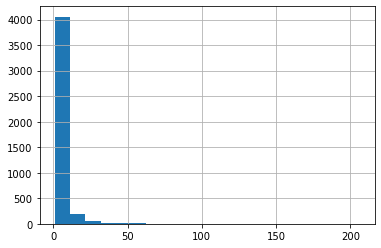

In [95]:
df_order_info['rating'].hist(bins=20)

> feature가 한쪽으로 너무 쏠려있으면 모델 학습할때 문제가 됨

> 한쪽으로 쏠린 비대칭적인 분포를 가진 피처는 로그를 통한 피처 정규화를 적용해야 한다. 데이터 사이의 편차를 줄임.

<AxesSubplot:>

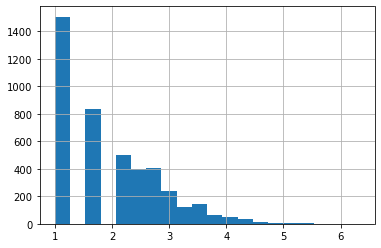

In [85]:
df_order_info['rating'].apply(lambda x:np.log(x)+1).hist(bins=20)

<AxesSubplot:>

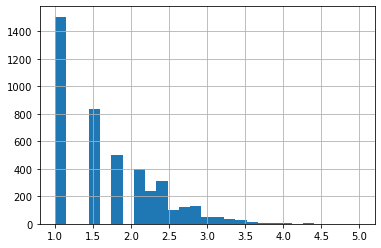

In [96]:
#점수를 1~5로 설정
df_order_info['rating'] = df_order_info['rating'].apply(lambda x: np.log(x)+1)
#min-max 스케일링
df_order_info['rating'] = ((df_order_info['rating'] - df_order_info['rating'].min()) / 
    (df_order_info['rating'].max() - df_order_info['rating'].min())*4)+1
df_order_info['rating'].hist(bins='auto')

> min-max 스케일링을 0~1사이로 표준화(위의 점수는 1~5이기에 *4+1 추가)

In [99]:
df_order_info

,CustomerID,old,new,both,rating
0,12346,1,0,0,1.000000
1,12347,92,3,8,2.460927
2,12348,21,0,0,2.040786
3,12350,16,0,0,1.000000
4,12352,43,12,2,1.000000
...,...,...,...,...,...
4329,18184,0,1,0,1.000000
4330,18209,0,8,0,1.000000
4331,18216,0,26,0,1.520393
4332,18249,0,8,0,3.081571
